In [2]:
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(5)

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv")



a_renomear = {"expected_hours":"horas_esperadas", "price":"preco", "unfinished":"nao_finalizado"}
dados.rename(columns=a_renomear, inplace=True)

trocar = {0:1, 1:0}

dados["finalizado"] = dados.nao_finalizado.map(trocar)

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)


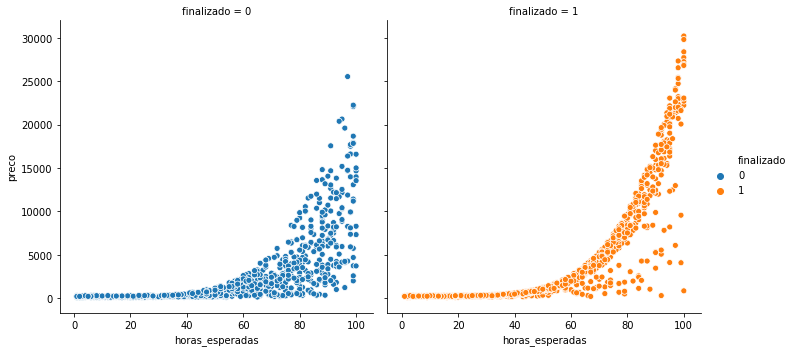

In [3]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [4]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos " % (len(treino_x), len(teste_x)))


modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia foi de : %.2f%% " % acuracia )


Treinaremos com 1617 elementos e testaremos com 540 elementos 
A acurácia foi de : 64.44% 


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [5]:
previsao_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsao_de_base)*100
print("A acurácia da previsao de base foi de : %.2f%% " % acuracia )

A acurácia da previsao de base foi de : 52.59% 


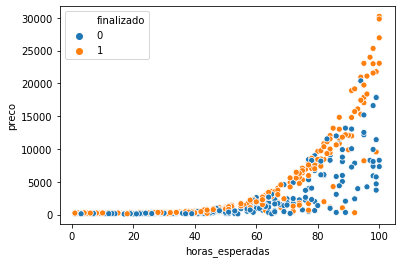

In [6]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)


x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()


In [17]:
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(),yy.ravel()]




# Z = modelo.predict(pontos)

# Z = Z.reshape(xx.shape)

array([[1, 4],
       [2, 5],
       [3, 6]])

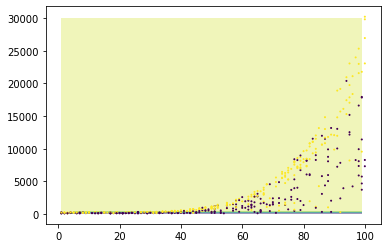

In [12]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [18]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

np.random.seed(5)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos " % (len(treino_x), len(teste_x)))

modelo1 = SVC()
modelo1.fit(treino_x, treino_y)

previsoes = modelo1.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia foi de : %.2f%% " % acuracia )


Treinaremos com 1617 elementos e testaremos com 540 elementos 
A acurácia foi de : 55.19% 


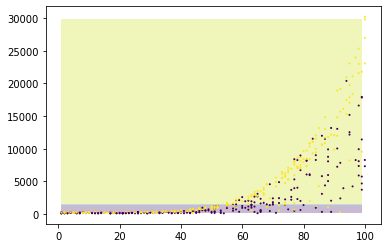

In [20]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(),yy.ravel()]

Z = modelo1.predict(pontos)

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)